In [1]:
import pandas as pd
from datetime import datetime
import glob
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
%matplotlib inline

In [80]:
list_16 = glob.glob('../Apartment/2016/*.csv')

all_data_2016_by_day = pd.DataFrame(columns=pd.date_range(start='2016-01-01', end='2016-12-31').date)
all_data_2016_by_month = pd.DataFrame(columns=range(1,13))

for apt in range(len(list_16)):
    apartment = pd.read_csv(list_16[apt], header=None)

    apartment.columns = ['Date', (list_16[apt].split('2016/')[1].split('_2016')[0])]
    apartment.Date = pd.to_datetime(apartment.Date).dt.date

    daily_sum = apartment.groupby('Date').agg('sum')
    daily_sum = daily_sum.transpose()
    
    apartment.columns = ['Month', (list_16[apt].split('2016/')[1].split('_2016')[0])]
    apartment.Month = pd.to_datetime(apartment.Month).dt.month
    
    monthly_sum = apartment.groupby('Month').agg('sum')
    monthly_sum = monthly_sum.transpose()
    
    all_data_2016_by_day = pd.concat([all_data_2016_by_day, daily_sum], sort=False)
    all_data_2016_by_month = pd.concat([all_data_2016_by_month, monthly_sum], sort=False)    
    
all_data_2016_by_month.bfill(inplace=True)
all_data_2016_by_month.ffill(inplace=True)
all_data_2016_by_day.bfill(inplace=True)
all_data_2016_by_day.ffill(inplace=True)

### Consumption is the first variable that should be examined.

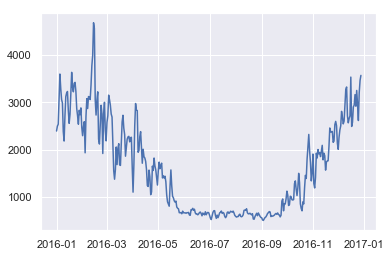

In [21]:
sns.lineplot(data=all_data_2016_by_day.mean())


Text(0,0.5,'Avg Consumption')

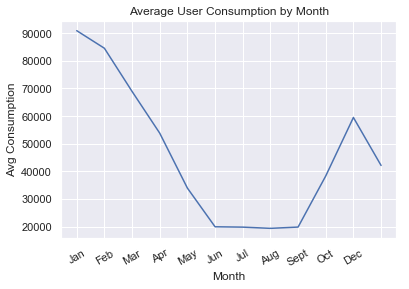

In [27]:
g = sns.lineplot(data=all_data_2016_by_month.mean())

plt.xticks(range(1, 12+1, 1), months, rotation=30)
plt.title('Average User Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Avg Consumption')

## The usage follows the expected path. It is higher in the winter months then the summer. Comparing the consumption to weather data will give a sense of how the two variables compare.

In [29]:
weather = pd.read_csv('../weather/apartment2016.csv')

In [30]:
weather['day'] = pd.to_datetime(weather['time'], unit='s').dt.date
weather_temps = weather[['temperature', 'day']]

weather_temps_max = weather_temps.groupby('day').agg('max')
weather_temps_min = weather_temps.groupby('day').agg('min')
weather_temps_mean = weather_temps.groupby('day').agg('mean')

temperatures = pd.concat([weather_temps_mean, weather_temps_max, weather_temps_min], axis=1)
temperatures.columns = ['avg_temp','max_temp','min_temp']

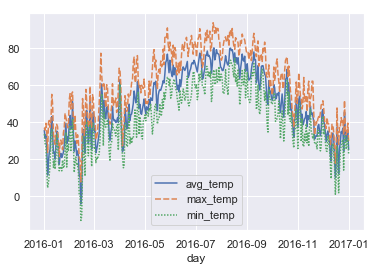

In [31]:
sns.lineplot(data=temperatures)

### Graphing daily averages produces a lot of noise. To get a better since of trends the monthly averages can be graphed and compared to consumption.

In [34]:
weather['month'] = pd.to_datetime(weather['time'], unit='s').dt.month
weather_temps = weather[['temperature', 'month']]

weather_temps_max = weather_temps.groupby('month').agg('max')
weather_temps_min = weather_temps.groupby('month').agg('min')
weather_temps_mean = weather_temps.groupby('month').agg('mean')

temperatures_month = pd.concat([weather_temps_mean, weather_temps_max, weather_temps_min], axis=1)
temperatures_month.columns = ['Avg Temp','Max Temp','Min Temp']

Text(0.5,1,'Average Temperature by Month \n vs. Consumption')

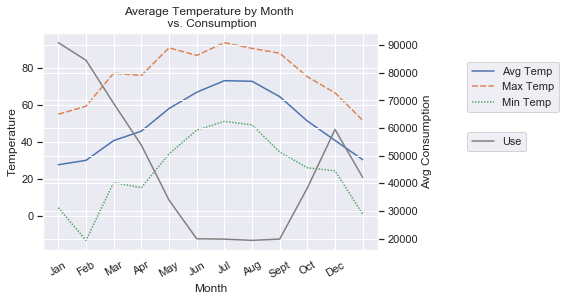

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.lineplot(data=temperatures_month)
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.xticks(range(1, 12+1, 1), months, rotation=30)

ax2 = ax.twinx()
sns.lineplot(data=all_data_2016_by_month.mean(), color='gray', label='Use')

ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.75))
ax2.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
ax2.set_ylabel('Avg Consumption')

plt.title('Average Temperature by Month \n vs. Consumption')



## The tempatures are lower in the winter and thus energy is being used to warm homes. In the summer months air conditioners are not using as much energy.

In [88]:
compare = pd.concat([all_data_2016_by_day.mean(), temperatures.avg_temp], axis =1,sort=True)
compare.columns = ['consumption', 'temperature']

In [89]:
compare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 2016-01-01 to 2017-01-01
Data columns (total 2 columns):
consumption    363 non-null float64
temperature    367 non-null float64
dtypes: float64(2)
memory usage: 8.6+ KB


In [90]:
compare.bfill(inplace=True)
compare.ffill(inplace=True)

Text(0.5,1,'Correlation of Consumption and Temperature')

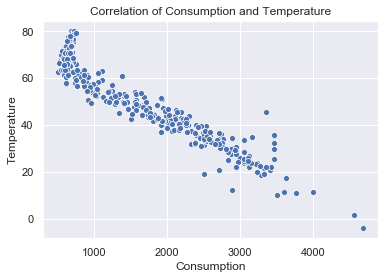

In [91]:
sns.scatterplot(x="consumption", y="temperature", data=compare)
plt.xlabel('Consumption')
plt.ylabel('Temperature')
plt.title('Correlation of Consumption and Temperature')

###  When comparing the consumption to the temperature some of the points are outliers.

Text(0.5,1,'Correlation of Consumption and Temperature \n for December')

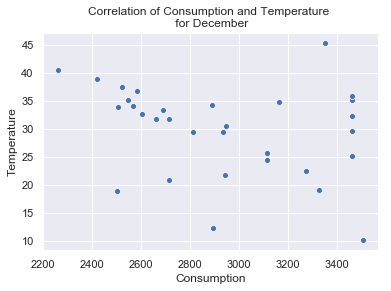

In [92]:
sns.scatterplot(x="consumption", y="temperature", data=compare[-31:])


plt.xlabel('Consumption')
plt.ylabel('Temperature')
plt.title('Correlation of Consumption and Temperature \n for December')

### Decemeber contains outliners for energy consumption versus day. It is worth exploring more variables to find correlations.

In [64]:
weather_humidity_days = weather[['humidity', 'day']]
weather_humidity_days_mean = weather_humidity_days.groupby('day').agg('mean')

compare_humidity = pd.concat([all_data_2016_by_day.mean(), weather_humidity_days_mean], axis =1, sort=True)
compare_humidity.columns = ['consumption', 'humidity']

In [65]:
compare_humidity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 2016-01-01 to 2017-01-01
Data columns (total 2 columns):
consumption    363 non-null float64
humidity       367 non-null float64
dtypes: float64(2)
memory usage: 8.6+ KB


In [ ]:
compare_humidity.bfill(inplace=True)
compare_humidity.ffill(inplace=True)

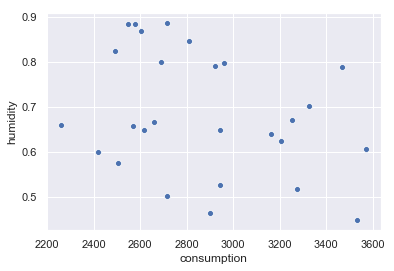

In [66]:
sns.scatterplot(x="consumption", y="humidity", data=compare_humidity[-31:-1])

In [93]:
precipIntensity_days_mean = weather[['precipIntensity', 'day']]
precipIntensity_days_mean = precipIntensity_days_mean.groupby('day').agg('mean')

compare_precipIntensity = pd.concat([all_data_2016_by_day.mean(), precipIntensity_days_mean], axis =1, sort=True)
compare_precipIntensity.columns = ['consumption', 'precipIntensity']

In [94]:
compare_precipIntensity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 2016-01-01 to 2017-01-01
Data columns (total 2 columns):
consumption        363 non-null float64
precipIntensity    367 non-null float64
dtypes: float64(2)
memory usage: 8.6+ KB


In [95]:
compare_precipIntensity.bfill(inplace=True)
compare_precipIntensity.ffill(inplace=True)

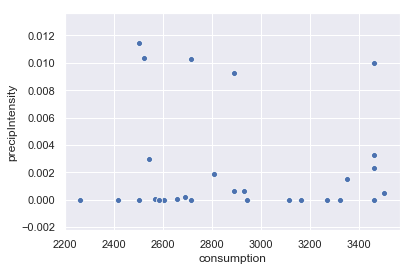

In [96]:
sns.scatterplot(x="consumption", y="precipIntensity", data=compare_precipIntensity[-31:-1])

In [97]:
apparentTemperature_mean = weather[['apparentTemperature', 'day']]
apparentTemperature_mean = apparentTemperature_mean.groupby('day').agg('mean')

compare_apparentTemperature = pd.concat([all_data_2016_by_day.mean(), apparentTemperature_mean], axis =1, sort=True)
compare_apparentTemperature.columns = ['consumption', 'apparentTemperature']

In [98]:
compare_apparentTemperature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 2016-01-01 to 2017-01-01
Data columns (total 2 columns):
consumption            363 non-null float64
apparentTemperature    367 non-null float64
dtypes: float64(2)
memory usage: 8.6+ KB


In [99]:
compare_apparentTemperature.bfill(inplace=True)
compare_apparentTemperature.ffill(inplace=True)

Text(0.5,1,'Correlation of Consumption and \n Apparent Temperature in December')

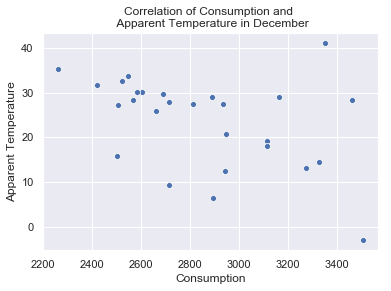

In [107]:
sns.scatterplot(x="consumption", y="apparentTemperature", data=compare_apparentTemperature[-31:-4])

plt.xlabel('Consumption')
plt.ylabel('Apparent Temperature')
plt.title('Correlation of Consumption and \n Apparent Temperature in December')

### There seems to be a correlation in apparent temperature and consumption in December. Does this hold true over the entire year?

Text(0.5,1,'Correlation of Consumption and \n Apparent Temperature')

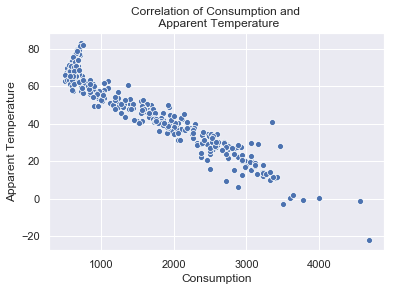

In [108]:
sns.scatterplot(x="consumption", y="apparentTemperature", data=compare_apparentTemperature[:-4])

plt.xlabel('Consumption')
plt.ylabel('Apparent Temperature')
plt.title('Correlation of Consumption and \n Apparent Temperature')

### Yes. What has more influence on consumption, apparent temperature or temperature?

In [109]:
import scipy.stats as sc

corr = sc.pearsonr(compare.consumption, compare.temperature)
print('Temperature has a ' + "{:.4f}".format(corr[0]) + ' correlation to consumption with a p-value of ' + "{:.4e}".format(corr[1]))

Temperature has a -0.9526 correlation to consumption with a p-value of 8.6482e-191


In [110]:
corr = sc.pearsonr(compare_apparentTemperature.consumption, compare_apparentTemperature.apparentTemperature)
print('Temperature has a ' + "{:.4f}".format(corr[0]) + ' correlation to consumption with a p-value of ' + "{:.4e}".format(corr[1]))

Temperature has a -0.9580 correlation to consumption with a p-value of 5.2256e-200


### Upon further investigation we find that apparent temperature has a stronger negative correlation to consumption than temperature.